# CME 193 - Lecture 2

This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy
3. Some plotting

## Bank Account example to illustrate Classes and Objects

In [0]:
debits = []
credits = []

In [0]:
def add_to_debits(value):
    global debits
    debits += [value]

In [0]:
def add_to_credits(value):
    global credits
    credits += [value]

In [0]:
add_to_credits(1000)
add_to_debits(10)
add_to_debits(15)
add_to_debits(100)

In [5]:
debits

[10, 15, 100]

In [0]:
def total_value():
    total =0 
    for val in debits:
        total-=val
    for val in credits:
        total+=val
    return total

In [7]:
total_value()

875

## Lets use Classes and Objects

In [0]:
class Account:
    accounts = []
    def __init__(s):
        s.accounts += [s]
        s.debits = []
        s.credits = []
        
    def add_to_debits(self,value):
        if value < self.total_value():
            self.debits += [value]
            return True
        else:
            print("Insufficient funds")
            return False
    def add_to_credits(self,value):
        self.credits += [value]
    def total_value(self):
        total =0 
        for val in self.debits:
            total-=val
        for val in self.credits:
            total+=val
        return total
    def transfer(self,other,value):
        if value > 0:
            if self.add_to_debits(value):
                other.add_to_credits(value)
        else:
            if other.add_to_debits(-value):
                self.add_to_credits(-value)

In [9]:
acc1 = Account()
acc1.add_to_credits(2000)
acc1.add_to_debits(10)
acc1.add_to_debits(15)
acc1.add_to_debits(100)
acc1.total_value()

1875

In [10]:
acc2 = Account()
acc2.add_to_credits(1000)
acc2.add_to_debits(10)
acc2.add_to_debits(15)
acc2.add_to_debits(100)
acc2.total_value()

875

In [11]:
acc1.total_value()

1875

In [12]:
acc2.total_value()

875

In [13]:
acc2.transfer(acc1,1000)

Insufficient funds


In [14]:
Account.accounts

[<__main__.Account at 0x7f06927c70f0>, <__main__.Account at 0x7f06927c71d0>]

## Exercise 1

### Add more functionality to the account class

1. Add a check before debits to ensure funds are available

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [0]:
import math

class Rational:
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')
        
        g = math.gcd(p, q)
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!
    

In [0]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [0]:
# object
r1

In [0]:
print( r1 + r2 )
print( float( r1 + r2 ))

13 / 4
3.25


In [0]:
#left add
print( r1 + 3 )

15 / 4


In [0]:
#right add
print( 3 + r1 )

15 / 4


# Exercise 2 (Solved)

### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__`
* `/` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.



In [0]:
class Rational:
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')
        
        g = math.gcd(p, q)
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!
    
    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return self + Rational(-other.p,other.q)
        elif isinstance(other, int):
            return self + (-other)
    
    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.p,self.q*other.q)
        elif isinstance(other, int):
            return Rational(self.p*other,self.q)
        
    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.q,self.q*other.p)
        elif isinstance(other, int):
            return Rational(self.p,self.q*other)
        
    def __repr__(self):
        return self.__str__()
    
    def __rmul__(self, other):
        return self*other;
    

In [0]:
# Write some examples to test your code

In [0]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [0]:
r3 = Rational(3)
print(r3)

3 / 1


In [0]:
r1

3 / 4

In [0]:
r1*r2

15 / 8

In [0]:
r1-r2

-7 / 4

In [0]:
r1/r2

3 / 10

# Exercise 3
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

In [0]:
def babylonian(S, num_iters=5):
    x = 1
    for i in range(num_iters):
        x = (x +S/x)/2
    return x

In [0]:
math.sqrt(24)

4.898979485566356

In [0]:
babylonian(24)

4.898996732283415

In [0]:
R=babylonian(Rational(24),3)
R

759841 / 144200

In [0]:
float(R)

4.898996732283414

# NumPy
This is a good segue into NumPy. Python provides only a handful of numeric types: ints, longs, floats, and complex numbers. We just declared a class that implements rational numbers. NumPy implements one very useful numeric type: multidimensional arrays.

In [0]:
# Quick note on importing
import math
math.sin(5)

-0.9589242746631385

In [0]:
import math as blah
blah.sin(5)

-0.9589242746631385

In [0]:
import numpy as np

In [16]:
x = np.array([[0, 1], [1, 5]])
x

array([[0, 1],
       [1, 5]])

In [17]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [18]:
x * y

array([[ 0,  0],
       [ 0, 20]])

In [19]:
x ** 2

array([[ 0,  1],
       [ 1, 25]])

In [20]:
x @ y  # Matrix multiplication

array([[ 0,  4],
       [ 4, 20]])

In [21]:
np.sum(x)

7

### Why NumPy?

In [22]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z=0
for i in range(10000):
    z += x[i]*y[i]

100 loops, best of 3: 4.72 ms per loop


In [0]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = np.dot(x,y)

157 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## NumPy functions for creating arrays

In [0]:
X=np.zeros((10,10))
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
X.shape

(10, 10)

In [0]:
Y=np.ones((10,10))
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [0]:
2*Y+3

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [0]:
R=np.random.rand(5,5)
R

array([[0.64446629, 0.70805065, 0.95646336, 0.52951524, 0.49450519],
       [0.5370803 , 0.42237792, 0.02297467, 0.09198015, 0.14401551],
       [0.76636942, 0.47037754, 0.50221061, 0.55399464, 0.02227305],
       [0.42761656, 0.08578177, 0.9736249 , 0.65996232, 0.99176347],
       [0.49721751, 0.00562474, 0.26555466, 0.76016967, 0.57228437]])

In [0]:
Rn = np.random.randn(5,5)
Rn

array([[ 0.83711373, -1.72977251, -0.26245584, -0.43675109,  0.43183074],
       [-0.59968977,  0.89092758, -0.27952594, -0.17089564, -0.47682424],
       [-0.17645622,  0.13371474,  0.0998115 ,  0.81843517,  1.5562339 ],
       [-2.075097  ,  0.58352273,  0.94242737, -2.34866914,  1.10590448],
       [ 1.0302426 , -1.10004875, -0.56078131, -0.4184607 ,  0.31346443]])

In [0]:
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [0]:
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [0]:
X = np.arange(0,100)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
X.reshape((-1,10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

In [0]:
np.random.rand(5,10)*50 +50

array([[70.84285466, 68.77761169, 61.40624803, 70.2390902 , 98.37640263,
        79.46421508, 84.59329712, 88.4828579 , 63.9948594 , 86.58223683],
       [73.92210117, 50.66796637, 74.01664179, 83.66782852, 70.57983994,
        54.19255479, 68.81685278, 88.68276697, 53.5632633 , 95.55128915],
       [70.93919068, 67.37294919, 88.5532396 , 84.34549022, 71.66834005,
        87.97428893, 88.90826612, 53.44765265, 71.44227178, 76.90328486],
       [98.49233516, 61.60424619, 80.92186123, 98.80182662, 90.53492992,
        97.13846263, 86.81902313, 91.1279146 , 71.61177088, 71.45970335],
       [50.98356245, 68.95130811, 59.37676448, 97.60793753, 88.88964646,
        61.49344852, 50.22291693, 64.61162864, 67.88687008, 58.07240122]])

In [0]:
np.arange(50,51,0.01)

array([50.  , 50.01, 50.02, 50.03, 50.04, 50.05, 50.06, 50.07, 50.08,
       50.09, 50.1 , 50.11, 50.12, 50.13, 50.14, 50.15, 50.16, 50.17,
       50.18, 50.19, 50.2 , 50.21, 50.22, 50.23, 50.24, 50.25, 50.26,
       50.27, 50.28, 50.29, 50.3 , 50.31, 50.32, 50.33, 50.34, 50.35,
       50.36, 50.37, 50.38, 50.39, 50.4 , 50.41, 50.42, 50.43, 50.44,
       50.45, 50.46, 50.47, 50.48, 50.49, 50.5 , 50.51, 50.52, 50.53,
       50.54, 50.55, 50.56, 50.57, 50.58, 50.59, 50.6 , 50.61, 50.62,
       50.63, 50.64, 50.65, 50.66, 50.67, 50.68, 50.69, 50.7 , 50.71,
       50.72, 50.73, 50.74, 50.75, 50.76, 50.77, 50.78, 50.79, 50.8 ,
       50.81, 50.82, 50.83, 50.84, 50.85, 50.86, 50.87, 50.88, 50.89,
       50.9 , 50.91, 50.92, 50.93, 50.94, 50.95, 50.96, 50.97, 50.98,
       50.99])

# Plotting

We will see some functions to do some quick plotting, we will come back to this library later.

In [0]:
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(-5,5,100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [0]:
y = x*x
y

array([2.50000000e+01, 2.40001020e+01, 2.30206101e+01, 2.20615243e+01,
       2.11228446e+01, 2.02045710e+01, 1.93067034e+01, 1.84292419e+01,
       1.75721865e+01, 1.67355372e+01, 1.59192939e+01, 1.51234568e+01,
       1.43480257e+01, 1.35930007e+01, 1.28583818e+01, 1.21441690e+01,
       1.14503622e+01, 1.07769615e+01, 1.01239669e+01, 9.49137843e+00,
       8.87919600e+00, 8.28741965e+00, 7.71604938e+00, 7.16508520e+00,
       6.63452709e+00, 6.12437506e+00, 5.63462912e+00, 5.16528926e+00,
       4.71635547e+00, 4.28782777e+00, 3.87970615e+00, 3.49199061e+00,
       3.12468115e+00, 2.77777778e+00, 2.45128048e+00, 2.14518927e+00,
       1.85950413e+00, 1.59422508e+00, 1.34935211e+00, 1.12488522e+00,
       9.20824406e-01, 7.37169677e-01, 5.73921028e-01, 4.31078461e-01,
       3.08641975e-01, 2.06611570e-01, 1.24987246e-01, 6.37690032e-02,
       2.29568411e-02, 2.55076013e-03, 2.55076013e-03, 2.29568411e-02,
       6.37690032e-02, 1.24987246e-01, 2.06611570e-01, 3.08641975e-01,
      

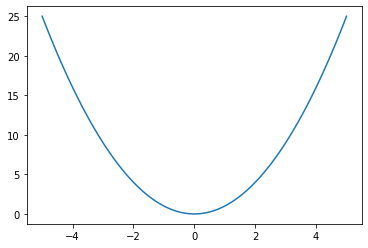

In [0]:
plt.plot(x,y)

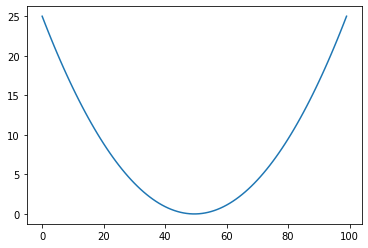

In [0]:
plt.plot(y)

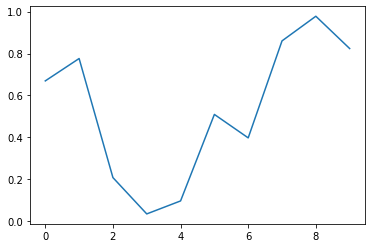

In [0]:
plt.plot(np.random.rand(10))

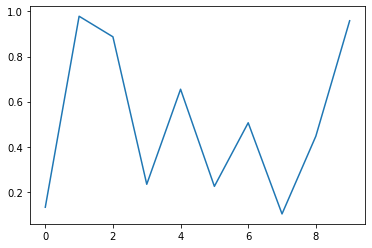

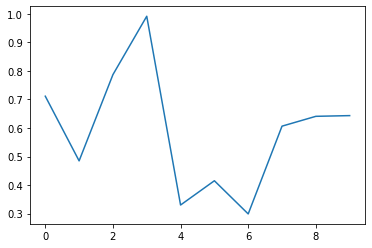

In [0]:
plt.plot(np.random.rand(10))
plt.figure()
plt.plot(np.random.rand(10))

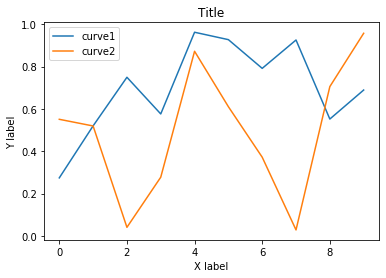

In [0]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1","curve2"])
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Title")
plt.savefig("plot.png")